In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as  sns
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.family'] = 'NanumGothic'

##  contents_marketing_data을 마크다운으로 수정

In [3]:
df = pd.read_excel('3.Contents-Marketing-Data.xlsx')


In [4]:
df = df[df["노출"] > 10] #노출 수 10보다 작은 프로모션은 삭제
df = df.iloc[1:,:] #맨 처음 알 스 없는 행(아마 합인거 같은데) 이 행도 삭제
df = df[['광고 이름','성','연령','랜딩 페이지 조회','링크 클릭','도달수','노출','지출 금액 (KRW)','CPM(1,000회 노출당 비용)']]
df = df.reset_index(drop=True)

In [5]:
def get_social_media(x):
    if'인스타피드'in str(x)  :
        return '인스타피드'
    elif  '인스타스토리' in str(x):
        return '인스타스토리'
    elif '페이스북' in str(x):
        return '페이스북'

In [6]:
# 연령별 선호 소셜 미디어 추출
df['소셜 미디어 종류'] = df['광고 이름'].apply(lambda x : get_social_media(x))
#광고이름에서 소셜미디어종류 빼주기
df['광고 이름'] =df['광고 이름'].str.extract(pat = '([0-9]+ \- [0-9])')

함수 변경 사항: 함수 명, 데이터 셋 명칭 변경,optional parameter (data = df) 

In [7]:
# 제가 생각했을때 참고할만한 값들만 조회할수 있게 만들었습니다. 추가로 보고싶은게 있다면 함수에서 추가하면 됩니다


# x에는 보고 싶은 항목을 리스트로 만들어 넣어줍니다

def get_result(x, data = df):
    a = data[['광고 이름','소셜 미디어 종류','성','연령','랜딩 페이지 조회','링크 클릭','도달수','노출','지출 금액 (KRW)']].groupby(x).sum()
    
    a['랜딩 페이지 조회당 비용'] = a['지출 금액 (KRW)'] / a['랜딩 페이지 조회']
    a['1000회 노출당 랜딩페이지조회'] = 1000 * a['랜딩 페이지 조회']/a['노출']
    a['CPC(링크 클릭당 비용)'] = a['지출 금액 (KRW)'] / a['링크 클릭']
    a['빈도'] = a['노출']/a['도달수']
    a['CPM(1,000회 노출당 비용)'] = 1000 * a['지출 금액 (KRW)']/a['노출']
    
    return a


In [8]:
#사용 예시1
get_result(['연령'])

,랜딩 페이지 조회,링크 클릭,도달수,노출,지출 금액 (KRW),랜딩 페이지 조회당 비용,1000회 노출당 랜딩페이지조회,CPC(링크 클릭당 비용),빈도,"CPM(1,000회 노출당 비용)"
연령,,,,,,,,,,
13-17,184.0,222.0,16744,17445,53937.334466,293.137687,10.547435,242.960966,1.041866,3091.850643
18-24,597.0,738.0,31805,32809,176263.848338,295.249327,18.196227,238.839903,1.031567,5372.423675
25-34,473.0,583.0,21024,21622,157239.002752,332.429181,21.875867,269.706694,1.028444,7272.176614
35-44,74.0,91.0,3535,3592,28674.715248,387.496152,20.601336,315.106761,1.016124,7982.938544
45-54,18.0,21.0,1043,1077,6558.071396,364.337300,16.713092,312.289114,1.032598,6089.202782


In [9]:
#사용 예시2(리스트 안의 순서도 중요합니다!)
get_result(['연령','성','소셜 미디어 종류'])

랜딩 페이지 조회  링크 클릭    도달수     노출   지출 금액 (KRW)  \
연령    성      소셜 미디어 종류                                                 
13-17 female 인스타스토리          58.0   65.0   6544   6719  16863.000000   
             인스타피드           68.0   76.0   4964   5018  18442.000000   
             페이스북            41.0   57.0   2507   2776  11660.045286   
      male   인스타스토리           1.0    1.0    461    464    944.000000   
             인스타피드           10.0   10.0    829    831   1978.000000   
             페이스북             6.0   13.0   1439   1637   4050.289181   
18-24 female 인스타스토리         102.0  122.0   6701   6750  28701.000000   
             인스타피드          250.0  308.0  12285  12345  77253.000000   
             페이스북           215.0  272.0  10757  11564  61068.498251   
      male   인스타스토리           4.0    4.0    164    167    581.000000   
             인스타피드           15.0   16.0    721    723   3440.000000   
             페이스북            11.0   16.0   1177   1260   5220.350088   
25-34 female 인스타스토리           7.0    9.0    487    491   3192.000000   
             인스타피드          308.0  371.0  10114  10160  94468.000000   
             페이스북            88.0  113.0   4367   4573  29188.496557   
      male   인스타스토리           1.0    1.0     29     29    239.000000   
             인스타피드           37.0   42.0   1549   1555  12269.000000   
             페이스북            32.0   47.0   4478   4814  17882.506195   
35-44 female 인스타피드           58.0   68.0   1744   1748  17987.000000   
             페이스북             8.0   11.0    664    686   4169.115376   
      male   인스타피드            4.0    5.0    371    372   3048.000000   
             페이스북             4.0    7.0    756    786   3470.599873   
45-54 female 인스타피드            8.0    8.0    202    203   1935.000000   
             페이스북             7.0    9.0    346    357   2282.047901   
      male   인스타피드            1.0    1.0     68     68    461.000000   
             페이스북             2.0    3.0    427    449   1880.023495   

                        랜딩 페이지 조회당 비용  1000회 노출당 랜딩페이지조회  CPC(링크 클릭당 비용)  \
연령    성      소셜 미디어 종류                                                     
13-17 female 인스타스토리        290.741379           8.632237      259.430769   
             인스타피드         271.205882          13.551216      242.657895   
             페이스북          284.391348          14.769452      204.562198   
      male   인스타스토리        944.000000           2.155172      944.000000   
             인스타피드         197.800000          12.033694      197.800000   
             페이스북          675.048197           3.665241      311.560706   
18-24 female 인스타스토리        281.382353          15.111111      235.254098   
             인스타피드         309.012000          20.251114      250.821429   
             페이스북          284.039527          18.592183      224.516538   
      male   인스타스토리        145.250000          23.952096      145.250000   
             인스타피드         229.333333          20.746888      215.000000   
             페이스북          474.577281           8.730159      326.271880   
25-34 female 인스타스토리        456.000000          14.256619      354.666667   
             인스타피드         306.714286          30.314961      254.630728   
             페이스북          331.687461          19.243385      258.305279   
      male   인스타스토리        239.000000          34.482759      239.000000   
             인스타피드         331.594595          23.794212      292.119048   
             페이스북          558.828319           6.647279      380.478855   
35-44 female 인스타피드         310.120690          33.180778      264.514706   
             페이스북          521.139422          11.661808      379.010489   
      male   인스타피드         762.000000          10.752688      609.600000   
             페이스북          867.649968           5.089059      495.799982   
45-54 female 인스타피드         241.875000          39.408867      241.875000   
             페이스북          326.006843          19.607843      253.560878   
      male   인스타피드         461.

In [10]:
copy_list = get_result(['광고 이름'])
copy_list

,랜딩 페이지 조회,링크 클릭,도달수,노출,지출 금액 (KRW),랜딩 페이지 조회당 비용,1000회 노출당 랜딩페이지조회,CPC(링크 클릭당 비용),빈도,"CPM(1,000회 노출당 비용)"
광고 이름,,,,,,,,,,
1 - 1,36.0,48.0,3156,3301,12039.000000,334.416667,10.905786,250.812500,1.045944,3647.076643
1 - 2,150.0,173.0,12043,12427,37714.974482,251.433163,12.070492,218.005633,1.031886,3034.921902
1 - 3,48.0,58.0,4401,4611,17251.000000,359.395833,10.409889,297.431034,1.047716,3741.270874
10 - 1,66.0,94.0,3546,3699,21610.000000,327.424242,17.842660,229.893617,1.043147,5842.119492
10 - 2,73.0,91.0,3778,3847,22533.000000,308.671233,18.975825,247.615385,1.018264,5857.291396
2 - 1,134.0,165.0,8044,8489,41271.000000,307.992537,15.785134,250.127273,1.055321,4861.703381
2 - 2,9.0,15.0,543,560,3378.000000,375.333333,16.071429,225.200000,1.031308,6032.142857
3 - 1,147.0,183.0,7792,8042,44910.000000,305.510204,18.279035,245.409836,1.032084,5584.431733
4 - 2,163.0,209.0,7538,7626,44871.000000,275.282209,21.374246,214.693780,1.011674,5883.949646


C:\Users\82102\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


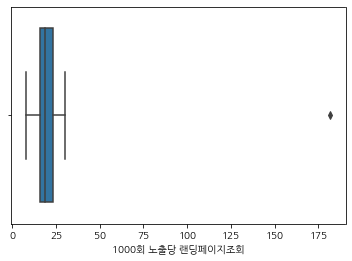

In [11]:
sns.boxplot(x='1000회 노출당 랜딩페이지조회', orient='v', data=copy_list)
plt.show()

## 의미있는 카피 찾아내기

In [12]:
copy_list.describe()

,랜딩 페이지 조회,링크 클릭,도달수,노출,지출 금액 (KRW),랜딩 페이지 조회당 비용,1000회 노출당 랜딩페이지조회,CPC(링크 클릭당 비용),빈도,"CPM(1,000회 노출당 비용)"
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,79.176471,97.352941,4361.823529,4502.647059,24863.116012,320.766545,28.210148,256.038192,1.033256,6102.384248
std,55.495760,66.365410,3136.111590,3247.100051,15097.462207,99.276762,40.055932,74.062173,0.024742,1904.125391
min,2.000000,2.000000,10.000000,11.000000,59.000000,29.500000,7.849895,29.500000,1.006777,3034.921902
25%,41.000000,58.000000,2361.000000,2377.000000,17251.000000,305.510204,15.785134,229.893617,1.018264,4861.703381
50%,66.000000,83.000000,3778.000000,3847.000000,22397.000000,327.424242,18.975825,250.127273,1.031308,5857.291396
75%,134.000000,165.000000,5175.000000,5293.000000,39876.997719,359.395833,23.215985,297.431034,1.045944,7588.391574
max,163.000000,209.000000,12043.000000,12427.000000,44910.000000,546.268293,181.818182,373.283333,1.100000,9399.663441


노출 값을 제1사분위수 (25%) 이하 값은 제외한다. <br>
1000회 노출당 랜딩페이지 조회가 의미있을려면 어느 정도 노출값이 높아야 하기 때문이다. <br>
또한, 랜딩 페이지 조회당 비용이 너무 높은 값을 제외하고자 제 3사분위수(75%) 이상은 제외한다.<br>
'1000회 노출당 랜딩페이지조회' 제3사분위수 (75%) 이상 값만 필터링<br>
'1000회 노출당 랜딩페이지조회'에서 차이를 보이고 있기 때문에 빈도 값은 큰 차이를 보이지 않아서 고려하지 않아도 될 것 같다.


In [13]:
# condition = (copy_list['노출'] > copy_list['노출'].quantile(.25) ) & (copy_list['랜딩 페이지 조회당 비용'] < copy_list['랜딩 페이지 조회당 비용'].quantile(.75)) & (copy_list['1000회 노출당 랜딩페이지조회'] > copy_list['1000회 노출당 랜딩페이지조회'].quantile(.75))
condition = (copy_list['노출'] >= 1000 ) & (copy_list['1000회 노출당 랜딩페이지조회'] >= copy_list['1000회 노출당 랜딩페이지조회'].quantile(.75))



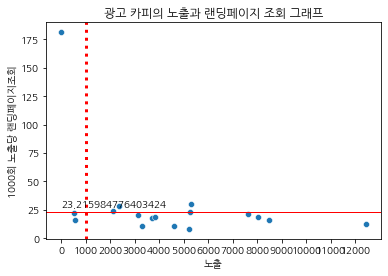

In [14]:
sns.scatterplot(x= '노출', y='1000회 노출당 랜딩페이지조회', data =copy_list)
plt.axvline(x=1000, color='r', linestyle=':', linewidth=3)
plt.axhline(y=copy_list['1000회 노출당 랜딩페이지조회'].quantile(.75), color='r', linewidth=1)
plt.text(0, copy_list['1000회 노출당 랜딩페이지조회'].quantile(.75) + 5, copy_list['1000회 노출당 랜딩페이지조회'].quantile(.75)  , fontstyle = 'italic')
plt.xticks(np.arange(0, 13000, 1000))
plt.title('광고 카피의 노출과 랜딩페이지 조회 그래프')
plt.show()

In [15]:
cond_copies = copy_list[condition]
cond_copies

,랜딩 페이지 조회,링크 클릭,도달수,노출,지출 금액 (KRW),랜딩 페이지 조회당 비용,1000회 노출당 랜딩페이지조회,CPC(링크 클릭당 비용),빈도,"CPM(1,000회 노출당 비용)"
광고 이름,,,,,,,,,,
5 - 1,161.0,187.0,5175,5293,44421.000000,275.906832,30.417533,237.545455,1.022802,8392.405063
6 - 1,122.0,138.0,5159,5255,39876.997719,326.860637,23.215985,288.963752,1.018608,7588.391574
7 - 2,50.0,58.0,2098,2114,18636.000000,372.720000,23.651845,321.310345,1.007626,8815.515610
8 - 1,67.0,83.0,2361,2377,22343.000000,333.477612,28.186790,269.192771,1.006777,9399.663441


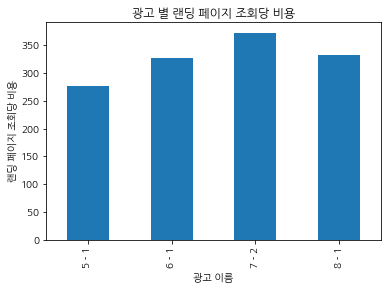

In [16]:
cond_copies['랜딩 페이지 조회당 비용'].plot(kind='bar')
plt.title("광고 별 랜딩 페이지 조회당 비용")
plt.ylabel('랜딩 페이지 조회당 비용')
plt.show()


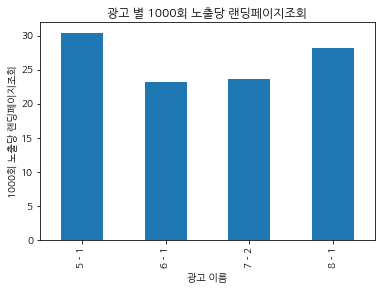

In [17]:
cond_copies['1000회 노출당 랜딩페이지조회'].plot(kind='bar')
plt.title("광고 별 1000회 노출당 랜딩페이지조회")
plt.ylabel('1000회 노출당 랜딩페이지조회')
plt.show()

In [18]:
x = cond_copies.index
y1 = cond_copies['랜딩 페이지 조회당 비용']
y2 = cond_copies['1000회 노출당 랜딩페이지조회']

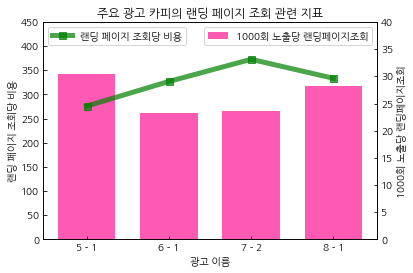

In [19]:
fig, ax1 = plt.subplots()

ax1.plot(x, y1, '-s', color='green', markersize=7, linewidth=5, alpha=0.7, label='랜딩 페이지 조회당 비용')
ax1.set_ylim(0, 450)
ax1.set_xlabel('광고 이름')
ax1.set_ylabel('랜딩 페이지 조회당 비용')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='deeppink', label='1000회 노출당 랜딩페이지조회', alpha=0.7, width=0.7)
ax2.set_ylim(0, 40)
ax2.set_ylabel('1000회 노출당 랜딩페이지조회')
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('주요 광고 카피의 랜딩 페이지 조회 관련 지표')

plt.show()


## 주요 카피 분석
### 주요 카피 여성 이용자 분석
5-1 광고가 25-35 회사원 남녀 타겟층인데. 광고는 여러 연령층에서 나갔다. <br>
원래 타겟층이 반응이 좋아보임 그걸 위주로 알아 가면 좋을 것 같음. 

In [20]:
# 위 4가지 광고 이름 리스트 생성
main_copy = ['5 - 1', '6 - 1', '7 - 2', '8 - 1']

In [21]:
data = df[df['광고 이름'].isin(main_copy)]
get_result(['광고 이름', '성', '연령'], data)

랜딩 페이지 조회  링크 클릭   도달수    노출   지출 금액 (KRW)  랜딩 페이지 조회당 비용  \
광고 이름 성      연령                                                                 
5 - 1 female 18-24       42.0   46.0  1425  1457  11088.208323     264.004960   
             25-34      118.0  138.0  3676  3759  32668.773701     276.854014   
             35-44        1.0    3.0    74    77    664.017976     664.017976   
6 - 1 female 25-34       85.0   96.0  3303  3360  28069.722856     330.232034   
             35-44       11.0   14.0   590   599   4677.097400     425.190673   
             45-54        4.0    4.0   172   173    786.047901     196.511975   
      male   25-34       19.0   21.0   715   730   4885.065237     257.108697   
             35-44        2.0    2.0   245   249   1037.040830     518.520415   
             45-54        1.0    1.0   134   144    422.023495     422.023495   
7 - 2 female 25-34       28.0   32.0   928   933   9256.000000     330.571429   
             35-44       15.0   18.0   571   571   5615.000000     374.333333   
             45-54        1.0    1.0    78    79    439.000000     439.000000   
      male   25-34        4.0    4.0   223   224   1455.000000     363.750000   
             35-44        1.0    1.0   204   209   1337.000000    1337.000000   
             45-54        1.0    2.0    94    98    534.000000     534.000000   
8 - 1 female 25-34       63.0   79.0  2296  2312  21671.000000     343.984127   
             35-44        4.0    4.0    65    65    672.000000     168.000000   

                    1000회 노출당 랜딩페이지조회  CPC(링크 클릭당 비용)        빈도  \
광고 이름 성      연령                                                   
5 - 1 female 18-24          28.826356      241.048007  1.022456   
             25-34          31.391327      236.730244  1.022579   
             35-44          12.987013      221.339325  1.040541   
6 - 1 female 25-34          25.297619      292.392946  1.017257   
             35-44          18.363940      334.078386  1.015254   
             45-54          23.121387      196.511975  1.005814   
      male   25-34          26.027397      232.622154  1.020979   
             35-44           8.032129      518.520415  1.016327   
             45-54           6.944444      422.023495  1.074627   
7 - 2 female 25-34          30.010718      289.250000  1.005388   
             35-44          26.269702      311.944444  1.000000   
             45-54          12.658228      439.000000  1.012821   
      male   25-34          17.857143      363.750000  1.004484   
             35-44           4.784689     1337.000000  1.024510   
             45-54          10.204082      267.000000  1.042553   
8 - 1 female 25-34          27.249135      274.316456  1.006969   
             35-44          61.538462      168.000000  1.000000   

                    CPM(1,000회 노출당 비용)  
광고 이름 성      연령                         
5 - 1 female 18-24         7610.300839  
             25-34         8690.815031  
             35-44         8623.610076  
6 - 1 female 25-34         8354.084183  
             35-44         7808.175959  
             45-54         4543.629488  
      male   25-34         6691.870188  
             35-44         4164.822612  
             45-54         2930.718712  
7 - 2 female 25-34         9920.685959  
             35-44         9833.625219  
             45-54         5556.962025  
      male   25-34         6495.535714  
             35-44         6397.129187  
             45-54         5448.979592  
8 - 1 female 25-34         9373.269896  
             35-44        10338.461538

In [22]:
data_2 = df[df['광고 이름'].isin(['6 - 1', '7 - 2', '8 - 1'])]
data_2 =  data_2[data_2['성'] == 'female']
data_female_year = get_result(['광고 이름', '연령'], data_2)
data_female_year

랜딩 페이지 조회  링크 클릭   도달수    노출   지출 금액 (KRW)  랜딩 페이지 조회당 비용  \
광고 이름 연령                                                                 
6 - 1 25-34       85.0   96.0  3303  3360  28069.722856     330.232034   
      35-44       11.0   14.0   590   599   4677.097400     425.190673   
      45-54        4.0    4.0   172   173    786.047901     196.511975   
7 - 2 25-34       28.0   32.0   928   933   9256.000000     330.571429   
      35-44       15.0   18.0   571   571   5615.000000     374.333333   
      45-54        1.0    1.0    78    79    439.000000     439.000000   
8 - 1 25-34       63.0   79.0  2296  2312  21671.000000     343.984127   
      35-44        4.0    4.0    65    65    672.000000     168.000000   

             1000회 노출당 랜딩페이지조회  CPC(링크 클릭당 비용)        빈도  CPM(1,000회 노출당 비용)  
광고 이름 연령                                                                      
6 - 1 25-34          25.297619      292.392946  1.017257         8354.084183  
      35-44          18.363940      334.078386  1.015254         7808.175959  
      45-54          23.121387      196.511975  1.005814         4543.629488  
7 - 2 25-34          30.010718      289.250000  1.005388         9920.685959  
      35-44          26.269702      311.944444  1.000000         9833.625219  
      45-54          12.658228      439.000000  1.012821         5556.962025  
8 - 1 25-34          27.249135      274.316456  1.006969         9373.269896  
      35-44          61.538462      168.000000  1.000000        10338.461538

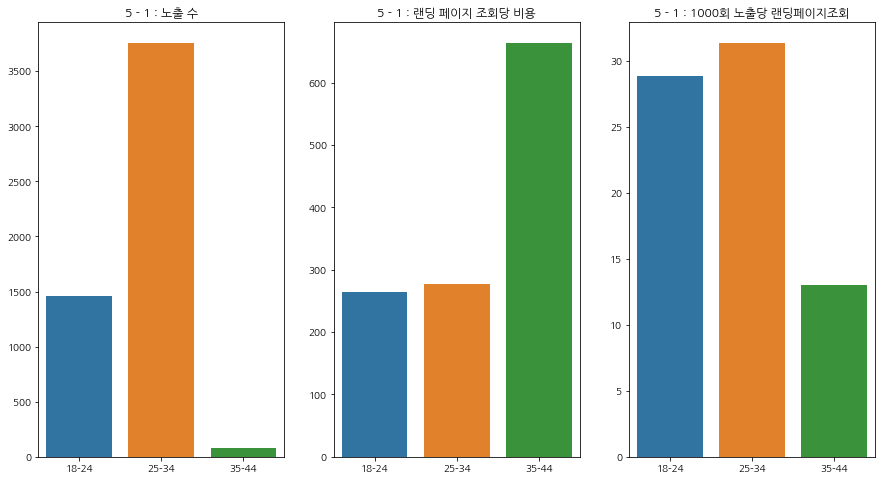

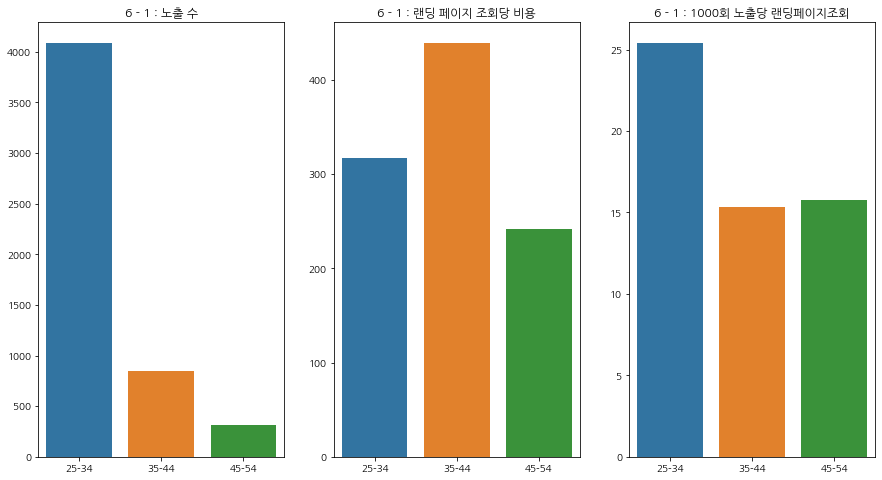

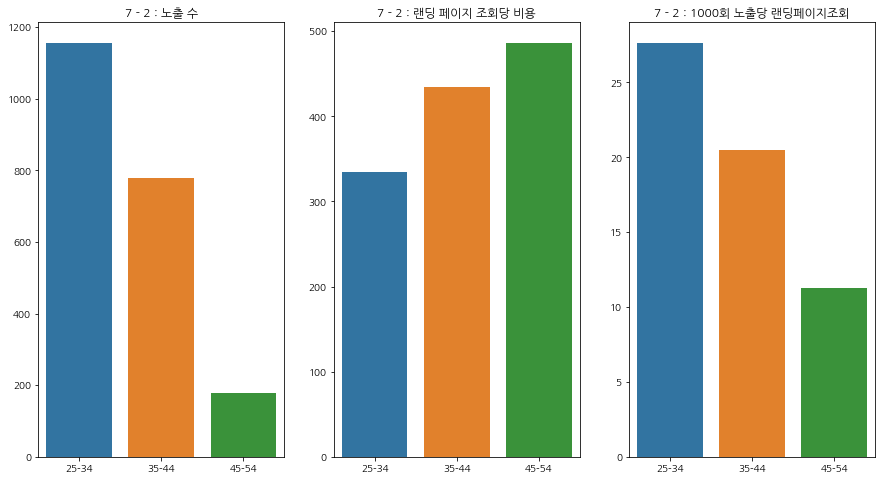

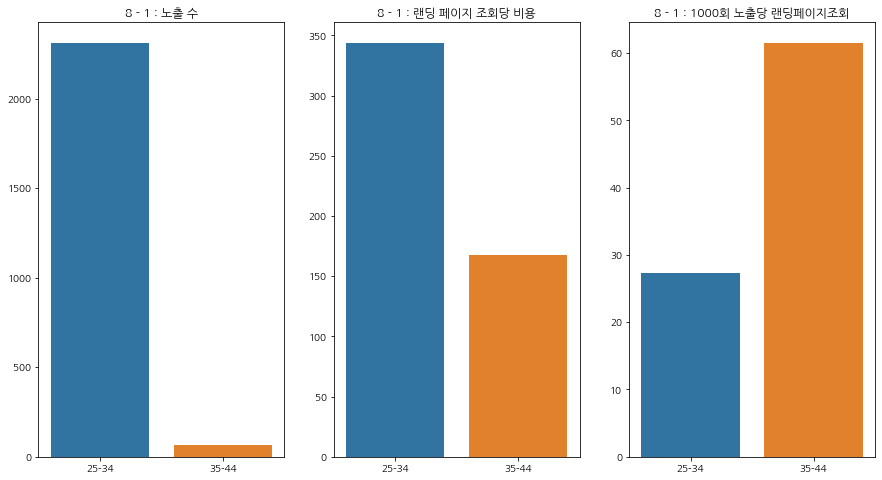

In [23]:
for i in range(4):
    lst = ['5 - 1', '6 - 1', '7 - 2', '8 - 1']
    data_by_copy = df[df['광고 이름'] == lst[i] ]
#     data_by_copy =  data_by_copy[data_by_copy['성'] == 'female']
    data_female_year = get_result(['연령'], data_by_copy)
    data_female_year

    titles = [f'{lst[i]} : 노출 수', f"{lst[i]} : 랜딩 페이지 조회당 비용", f"{lst[i]} : 1000회 노출당 랜딩페이지조회"]
    Y = ['노출', "랜딩 페이지 조회당 비용", "1000회 노출당 랜딩페이지조회"]

    plt.figure(figsize=(15,8))

    for j in range(3):
      plt.subplot(1, 3, j+1)
      sns.barplot(data = data_female_year , x=data_female_year.index, y=Y[j])
      plt.title(titles[j])
      plt.xlabel('')
      plt.ylabel('')

In [24]:
data_by_copy = df[df['광고 이름'] == '6 - 1' ]
data_by_copy =  data_by_copy[data_by_copy['성'] == 'female']
data_female_year = get_result(['광고 이름', '연령'], data_by_copy)
data_female_year


랜딩 페이지 조회  링크 클릭   도달수    노출   지출 금액 (KRW)  랜딩 페이지 조회당 비용  \
광고 이름 연령                                                                 
6 - 1 25-34       85.0   96.0  3303  3360  28069.722856     330.232034   
      35-44       11.0   14.0   590   599   4677.097400     425.190673   
      45-54        4.0    4.0   172   173    786.047901     196.511975   

             1000회 노출당 랜딩페이지조회  CPC(링크 클릭당 비용)        빈도  CPM(1,000회 노출당 비용)  
광고 이름 연령                                                                      
6 - 1 25-34          25.297619      292.392946  1.017257         8354.084183  
      35-44          18.363940      334.078386  1.015254         7808.175959  
      45-54          23.121387      196.511975  1.005814         4543.629488

In [25]:
data_5_1 = df[df['광고 이름'].isin(['5 - 1'])]
df_5_1 = get_result(['성', '연령'], data_5_1)
df_5_1

랜딩 페이지 조회  링크 클릭   도달수    노출   지출 금액 (KRW)  랜딩 페이지 조회당 비용  \
성      연령                                                                 
female 18-24       42.0   46.0  1425  1457  11088.208323     264.004960   
       25-34      118.0  138.0  3676  3759  32668.773701     276.854014   
       35-44        1.0    3.0    74    77    664.017976     664.017976   

              1000회 노출당 랜딩페이지조회  CPC(링크 클릭당 비용)        빈도  CPM(1,000회 노출당 비용)  
성      연령                                                                      
female 18-24          28.826356      241.048007  1.022456         7610.300839  
       25-34          31.391327      236.730244  1.022579         8690.815031  
       35-44          12.987013      221.339325  1.040541         8623.610076

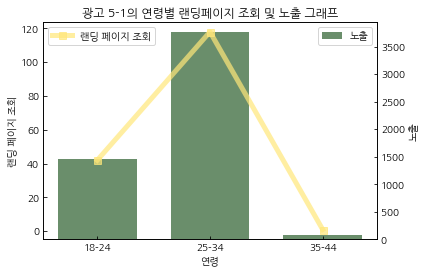

In [26]:
x = df_5_1.index.get_level_values('연령')
y1 = df_5_1['랜딩 페이지 조회']
y2 = df_5_1['노출']

fig, ax1 = plt.subplots()

ax1.plot(x, y1, '-s', color='#FFE77A', markersize=7, linewidth=5, alpha=0.7, label='랜딩 페이지 조회')
# ax1.set_ylim(0, 750)
ax1.set_xlabel('연령')
ax1.set_ylabel('랜딩 페이지 조회')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='#2C5F2D', label='노출', alpha=0.7, width=0.7)
# ax2.set_ylim(0, 40)
ax2.set_ylabel('노출')
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('광고 5-1의 연령별 랜딩페이지 조회 및 노출 그래프')

plt.show()

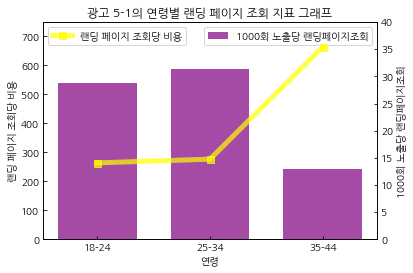

In [27]:
x = df_5_1.index.get_level_values('연령')
y1 = df_5_1['랜딩 페이지 조회당 비용']
y2 = df_5_1['1000회 노출당 랜딩페이지조회']

fig, ax1 = plt.subplots()

ax1.plot(x, y1, '-s', color='yellow', markersize=7, linewidth=5, alpha=0.7, label='랜딩 페이지 조회당 비용')
ax1.set_ylim(0, 750)
ax1.set_xlabel('연령')
ax1.set_ylabel('랜딩 페이지 조회당 비용')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='purple', label='1000회 노출당 랜딩페이지조회', alpha=0.7, width=0.7)
ax2.set_ylim(0, 40)
ax2.set_ylabel('1000회 노출당 랜딩페이지조회')
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('광고 5-1의 연령별 랜딩 페이지 조회 지표 그래프')


plt.show()

In [28]:
get_result([ '성', '연령', '광고 이름'], data)

랜딩 페이지 조회  링크 클릭   도달수    노출   지출 금액 (KRW)  랜딩 페이지 조회당 비용  \
성      연령    광고 이름                                                              
female 18-24 5 - 1       42.0   46.0  1425  1457  11088.208323     264.004960   
       25-34 5 - 1      118.0  138.0  3676  3759  32668.773701     276.854014   
             6 - 1       85.0   96.0  3303  3360  28069.722856     330.232034   
             7 - 2       28.0   32.0   928   933   9256.000000     330.571429   
             8 - 1       63.0   79.0  2296  2312  21671.000000     343.984127   
       35-44 5 - 1        1.0    3.0    74    77    664.017976     664.017976   
             6 - 1       11.0   14.0   590   599   4677.097400     425.190673   
             7 - 2       15.0   18.0   571   571   5615.000000     374.333333   
             8 - 1        4.0    4.0    65    65    672.000000     168.000000   
       45-54 6 - 1        4.0    4.0   172   173    786.047901     196.511975   
             7 - 2        1.0    1.0    78    79    439.000000     439.000000   
male   25-34 6 - 1       19.0   21.0   715   730   4885.065237     257.108697   
             7 - 2        4.0    4.0   223   224   1455.000000     363.750000   
       35-44 6 - 1        2.0    2.0   245   249   1037.040830     518.520415   
             7 - 2        1.0    1.0   204   209   1337.000000    1337.000000   
       45-54 6 - 1        1.0    1.0   134   144    422.023495     422.023495   
             7 - 2        1.0    2.0    94    98    534.000000     534.000000   

                    1000회 노출당 랜딩페이지조회  CPC(링크 클릭당 비용)        빈도  \
성      연령    광고 이름                                                
female 18-24 5 - 1          28.826356      241.048007  1.022456   
       25-34 5 - 1          31.391327      236.730244  1.022579   
             6 - 1          25.297619      292.392946  1.017257   
             7 - 2          30.010718      289.250000  1.005388   
             8 - 1          27.249135      274.316456  1.006969   
       35-44 5 - 1          12.987013      221.339325  1.040541   
             6 - 1          18.363940      334.078386  1.015254   
             7 - 2          26.269702      311.944444  1.000000   
             8 - 1          61.538462      168.000000  1.000000   
       45-54 6 - 1          23.121387      196.511975  1.005814   
             7 - 2          12.658228      439.000000  1.012821   
male   25-34 6 - 1          26.027397      232.622154  1.020979   
             7 - 2          17.857143      363.750000  1.004484   
       35-44 6 - 1           8.032129      518.520415  1.016327   
             7 - 2           4.784689     1337.000000  1.024510   
       45-54 6 - 1           6.944444      422.023495  1.074627   
             7 - 2          10.204082      267.000000  1.042553   

                    CPM(1,000회 노출당 비용)  
성      연령    광고 이름                      
female 18-24 5 - 1         7610.300839  
       25-34 5 - 1         8690.815031  
             6 - 1         8354.084183  
             7 - 2         9920.685959  
             8 - 1         9373.269896  
       35-44 5 - 1         8623.610076  
             6 - 1         7808.175959  
             7 - 2         9833.625219  
             8 - 1        10338.461538  
       45-54 6 - 1         4543.629488  
             7 - 2         5556.962025  
male   25-34 6 - 1         6691.870188  
             7 - 2         6495.535714  
       35-44 6 - 1         4164.822612  
             7 - 2         6397.129187  
       45-54 6 - 1         2930.718712  
             7 - 2         5448.979592

In [29]:
# data_female = data[data['성'] == ]
# get_result([ '성', '연령', '광고 이름'], data)

In [30]:
get_result([ '성', '연령'], data)

랜딩 페이지 조회  링크 클릭    도달수     노출   지출 금액 (KRW)  랜딩 페이지 조회당 비용  \
성      연령                                                                   
female 18-24       42.0   46.0   1425   1457  11088.208323     264.004960   
       25-34      294.0  345.0  10203  10364  91665.496557     311.787403   
       35-44       31.0   39.0   1300   1312  11628.115376     375.100496   
       45-54        5.0    5.0    250    252   1225.047901     245.009580   
male   25-34       23.0   25.0    938    954   6340.065237     275.655010   
       35-44        3.0    3.0    449    458   2374.040830     791.346943   
       45-54        2.0    3.0    228    242    956.023495     478.011747   

              1000회 노출당 랜딩페이지조회  CPC(링크 클릭당 비용)        빈도  CPM(1,000회 노출당 비용)  
성      연령                                                                      
female 18-24          28.826356      241.048007  1.022456         7610.300839  
       25-34          28.367426      265.697091  1.015780         8844.605997  
       35-44          23.628049      298.156805  1.009231         8862.892817  
       45-54          19.841270      245.009580  1.008000         4861.301196  
male   25-34          24.109015      253.602609  1.017058         6645.770689  
       35-44           6.550218      791.346943  1.020045         5183.495263  
       45-54           8.264463      318.674498  1.061404         3950.510308

전반적으로 25 - 34 세에 여성은 광고 문구와 상관없이 노출도 많이 되고 그만큼 반응이 잘 나타는 걸로 보임. <br>
남자보다 여자가 더 높이 반응 보임. <br>

5-1 분석 : 4개 중 가장 핫한 반응 보임.
5 - 1은 25 -35세를 타겟층으로 잡았으나 18 - 24에도 반응
잘 나타는 것으로 드러남 <br> 
5-1 에서만 반응이 잘 나타나는 것으로 보여서 18-24에게 반응 보인 
광고 문구 찾아봐야 할 것이다. <br> 
현재 분석하는 광고 문구에서 18-24에 대한 반응이 없어서 이쪽으로 
광고 문구 더 넣는게 어떨지? <br>
남자 자료가 없는데. 남자 고객층 공략하면 어떨지? <br>

6-1이랑 7-2이 비슷한 양상을 보였으나
35-54 여성에게 6-1보다 7-2가 더 효과적인 전략인 것으로 보임 <br>
남성 데이터는 노출 값이 너무 낮아서 큰 의미가 없어 보임.. <br>
25-34 

여성 25-34에게 8-1 광고가 젤 가성비가 떨어짐.


### 여성 연령대 별 분석

In [31]:
female_data = df[df['성'] =='female']
get_result(['연령'], female_data)

,랜딩 페이지 조회,링크 클릭,도달수,노출,지출 금액 (KRW),랜딩 페이지 조회당 비용,1000회 노출당 랜딩페이지조회,CPC(링크 클릭당 비용),빈도,"CPM(1,000회 노출당 비용)"
연령,,,,,,,,,,
13-17,167.0,198.0,14015,14513,46965.045286,281.227816,11.506925,237.197198,1.035533,3236.067339
18-24,567.0,702.0,29743,30659,167022.498251,294.572307,18.493754,237.923787,1.030797,5447.747749
25-34,403.0,493.0,14968,15224,126848.496557,314.760537,26.471361,257.299182,1.017103,8332.139816
35-44,66.0,79.0,2408,2434,22156.115376,335.698718,27.115859,280.457157,1.010797,9102.758987
45-54,15.0,17.0,548,560,4217.047901,281.136527,26.785714,248.061641,1.021898,7530.442681


In [32]:
female_data_by_age = female_data[female_data['연령'].isin(['35-44'])]
female_data_main_copy = female_data_by_age[female_data_by_age['광고 이름'].isin(main_copy)]
female_data_35_44 = get_result(['광고 이름'], female_data_main_copy)
female_data_35_44

,랜딩 페이지 조회,링크 클릭,도달수,노출,지출 금액 (KRW),랜딩 페이지 조회당 비용,1000회 노출당 랜딩페이지조회,CPC(링크 클릭당 비용),빈도,"CPM(1,000회 노출당 비용)"
광고 이름,,,,,,,,,,
5 - 1,1.0,3.0,74,77,664.017976,664.017976,12.987013,221.339325,1.040541,8623.610076
6 - 1,11.0,14.0,590,599,4677.097400,425.190673,18.363940,334.078386,1.015254,7808.175959
7 - 2,15.0,18.0,571,571,5615.000000,374.333333,26.269702,311.944444,1.000000,9833.625219
8 - 1,4.0,4.0,65,65,672.000000,168.000000,61.538462,168.000000,1.000000,10338.461538


<AxesSubplot:title={'center':'35~44세의 주요 광고 문구 노출 값 그래프 '}, xlabel='광고 이름', ylabel='노출'>

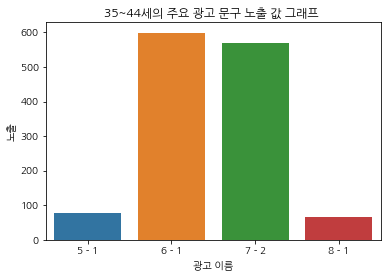

In [33]:
plt.title('35~44세의 주요 광고 문구 노출 값 그래프 ')
sns.barplot(data=female_data_35_44,x=female_data_35_44.index, y='노출')

In [42]:
compact_data= female_data_35_44.iloc[1:3]

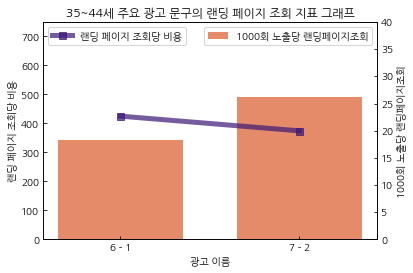

In [43]:
x= compact_data.index
y1 = compact_data['랜딩 페이지 조회당 비용']
y2 = compact_data['1000회 노출당 랜딩페이지조회']

fig, ax1 = plt.subplots()

ax1.plot(x, y1, '-s', color='#3B1877', markersize=7, linewidth=5, alpha=0.7, label='랜딩 페이지 조회당 비용')
ax1.set_ylim(0, 750)
ax1.set_xlabel('광고 이름')
ax1.set_ylabel('랜딩 페이지 조회당 비용')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='#DA5A2A', label='1000회 노출당 랜딩페이지조회', alpha=0.7, width=0.7)
ax2.set_ylim(0, 40)
ax2.set_ylabel('1000회 노출당 랜딩페이지조회')
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('35~44세 주요 광고 문구의 랜딩 페이지 조회 지표 그래프')

plt.show()

광고 타겟에 효과적으로.. 반대로..
25-34 여성 직장 관련
그 이상은 가족 관련..
18-24 여성에도 5-1 효과 -> 가족

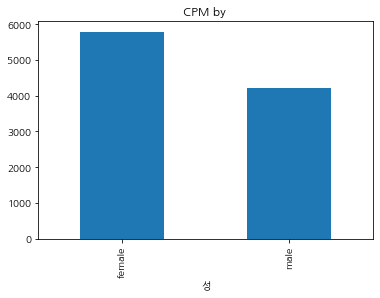

In [35]:
pd.DataFrame(get_result(['성'])).index
Age = get_result(['성'])
Age = Age.sort_values(by='CPM(1,000회 노출당 비용)', ascending=False)
Age['CPM(1,000회 노출당 비용)'].plot(kind='bar')
plt.title("CPM by ")
plt.show()